Plots: HalfLightRadiusAXVLine
=============================

This example illustrates how to plot the half-light radius of a `LightProfile` on 1D figures of its properties.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a simple `LightProfile` which we'll plot.

In [2]:
bulge = al.lp.EllSersic(
    centre=(0.0, 0.0),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, angle=45.0),
    intensity=1.0,
    effective_radius=0.8,
    sersic_index=4.0,
)

We also need the 2D grid the `LightProfile` is evaluated on.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the light profile and grid to a `LightProfilePlotter` and call the `figures_1d` methods to plot its image
as a function of radius.

The `LightProfile` includes the half-light radius as an internal property, meaning we can plot it via an `Include1D` 
object.

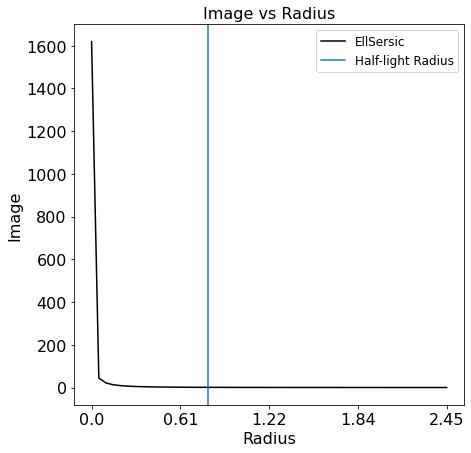

In [4]:
include_1d = aplt.Include1D(half_light_radius=True)
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=bulge, grid=grid, include_1d=include_1d
)
light_profile_plotter.figures_1d(image=True)

The appearance of the half-light radius is customized using a `HalfLightRadiusAXVLine` object.

To plot the half-light radius as a vertical line this wraps the following matplotlib method:

 plt.axvline: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.axvline.html

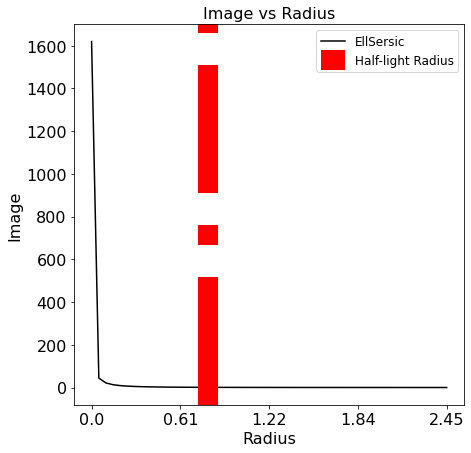

In [5]:
half_light_radius_axvline = aplt.HalfLightRadiusAXVLine(
    linestyle="-.", c="r", linewidth=20
)

mat_plot_1d = aplt.MatPlot1D(half_light_radius_axvline=half_light_radius_axvline)

light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=bulge, grid=grid, mat_plot_1d=mat_plot_1d, include_1d=include_1d
)
light_profile_plotter.figures_1d(image=True)

To plot the half-light radius manually, we can pass it into a` Visuals1D` object.

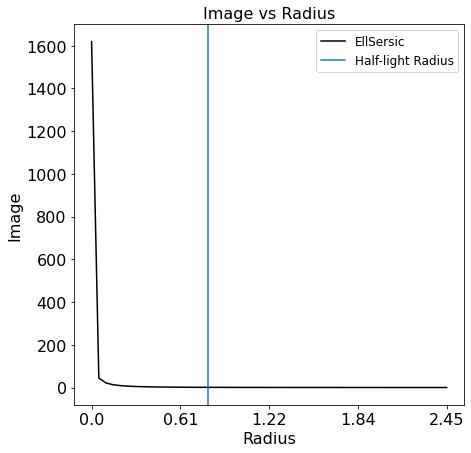

In [6]:
visuals_1d = aplt.Visuals1D(half_light_radius=bulge.half_light_radius)

light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=bulge, grid=grid, visuals_1d=visuals_1d
)
light_profile_plotter.figures_1d(image=True)

Finish.